Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import json
import pandas
from pandas import json_normalize

# Load the data (DataFrames) created in Part 1 & 2)
with open("osaka_docomo_stations.json", "r", encoding="utf-8") as f:
    station_data = json.load(f)

with open("yelp_venues_osaka.json", "r", encoding="utf-8") as f:
    yelp_venue_data = json.load(f)

# Normalize both sets of data to ensure compatibility when joining
df_stations = json_normalize(station_data)

df_venues = json_normalize(yelp_venue_data)

# Set "station_name" as the Primary Key for both (renaming the header for the Part 1 data to match)
df_stations.rename(columns={"name": "station_name"}, inplace=True)

# Left-Join the data based on "station_name"
df_joined = pandas.merge(df_venues, df_stations, on="station_name", how="left")


OPTIONAL - Preview newly joined DataFrame + Save to JSON & CSV files locally

In [2]:
df_joined.to_json("joined_osaka_venue_station_data.json", orient="records", indent=2, force_ascii=False)
df_joined.to_csv("joined_osaka_venue_station_data.csv", index=False, encoding="utf-8-sig")

print(f"Joined data saved.")

df_joined.head()

Joined data saved.


,station_name,venue_name,venue_category,venue_latitude,venue_longitude,venue_address,venue_rating,id,latitude,longitude,timestamp,free_bikes,empty_slots,extra.uid,extra.renting,extra.returning,extra.last_updated,extra.slots,extra.virtual
0,208.名鉄協商パーキング太閤第12,Maruya Honten Meieki,Unagi,35.169632,136.883985,"中村区名駅1-2-1, 名鉄百貨店本館 9F, Nagoya, 愛知県 〒450-0002,...",4.7,005137d4cb790f7ed167521b8972b43f,35.166589,136.878612,2025-05-16T04:22:47.946143+00:00Z,1,2,00001067,True,True,1747369328,3,False
1,208.名鉄協商パーキング太閤第12,Midtown BBQ Nagoya,Barbeque,35.168346,136.891907,"中村区名駅5丁目24−3, Nagoya, 愛知県 〒450-0002, Japan",4.6,005137d4cb790f7ed167521b8972b43f,35.166589,136.878612,2025-05-16T04:22:47.946143+00:00Z,1,2,00001067,True,True,1747369328,3,False
2,208.名鉄協商パーキング太閤第12,Hitsumabushi Nagoya Bincho Esca,Unagi,35.170302,136.879560,"中村区椿町6-9, 地下街内, Nagoya, 愛知県 〒453-0015, Japan",4.6,005137d4cb790f7ed167521b8972b43f,35.166589,136.878612,2025-05-16T04:22:47.946143+00:00Z,1,2,00001067,True,True,1747369328,3,False
3,208.名鉄協商パーキング太閤第12,Misen JR Nagoya Station,Ramen,35.168690,136.882478,"中村区名駅1-1-4, Nagoya, 愛知県 〒450-0002, Japan",4.2,005137d4cb790f7ed167521b8972b43f,35.166589,136.878612,2025-05-16T04:22:47.946143+00:00Z,1,2,00001067,True,True,1747369328,3,False
4,208.名鉄協商パーキング太閤第12,Ippudō Nagoyaekimendōri,Ramen,35.169868,136.881301,"中村区名駅1-1-4, JR名古屋駅 名古屋うまいもん通り内, Nagoya, 愛知県 〒4...",4.8,005137d4cb790f7ed167521b8972b43f,35.166589,136.878612,2025-05-16T04:22:47.946143+00:00Z,1,2,00001067,True,True,1747369328,3,False


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.

Environment Set-Up for EDA Process

In [3]:
# Since the data is from the Osaka network, the environment needs to be set-up to display Japanese characters
!apt-get -y install fonts-ipaexfont
!pip install japanize-matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'IPAexGothic'

#Load the saved, joined, DataFrame generated in the previous section of this Project Part
joined_osaka_venue_station_data = pandas.read_json("joined_osaka_venue_station_data.json")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipaexfont-gothic fonts-ipaexfont-mincho
The following NEW packages will be installed:
  fonts-ipaexfont fonts-ipaexfont-gothic fonts-ipaexfont-mincho
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 7,954 kB of archives.
After this operation, 14.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipaexfont-gothic all 00401-3ubuntu1 [3,341 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipaexfont-mincho all 00401-3ubuntu1 [4,604 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipaexfont all 00401-3ubuntu1 [8,428 B]
Fetched 7,954 kB in 1s (6,579 kB/s)
Selecting previously unselected package fonts-ipaexfont-gothic.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .

Generating Vizualizations for EDA

Bar Plot: Top 10 Highest-Rated Venues in Osaka (w/closest bike station)

<ipython-input-4-1cca1fda908d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


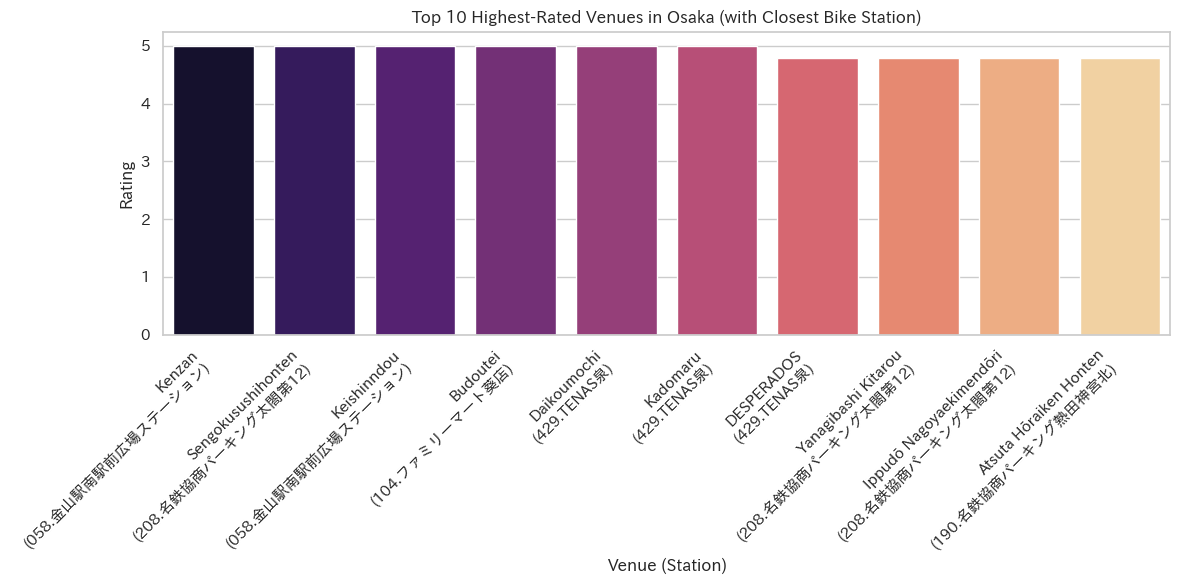

In [4]:
top_10 = joined_osaka_venue_station_data.sort_values(by="venue_rating", ascending=False).head(10)
top_10["label"] = top_10["venue_name"] + "\n(" + top_10["station_name"] + ")"

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10,
    x="label",
    y="venue_rating",
    palette="magma"
)

plt.title("Top 10 Highest-Rated Venues in Osaka (with Closest Bike Station)")
plt.ylabel("Rating")
plt.xlabel("Venue (Station)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

From this Bar Plot, there seems to be an initial correlation between certain bike stations and the highest rated restaurants. This seems quite plausible as it would make sense for bike stations to be accessible at more popular locations.

What's interesting to note as well, is that Bike Station 429 (TENAS) seems to have the highest concentraiton of highly rated restaurants within our pool, with 3 restaurants within its 1000m / 1km radius vicinity, rated between 4.8 - 5.0.

Scatter Plot: Station Locations with Venue Ratings

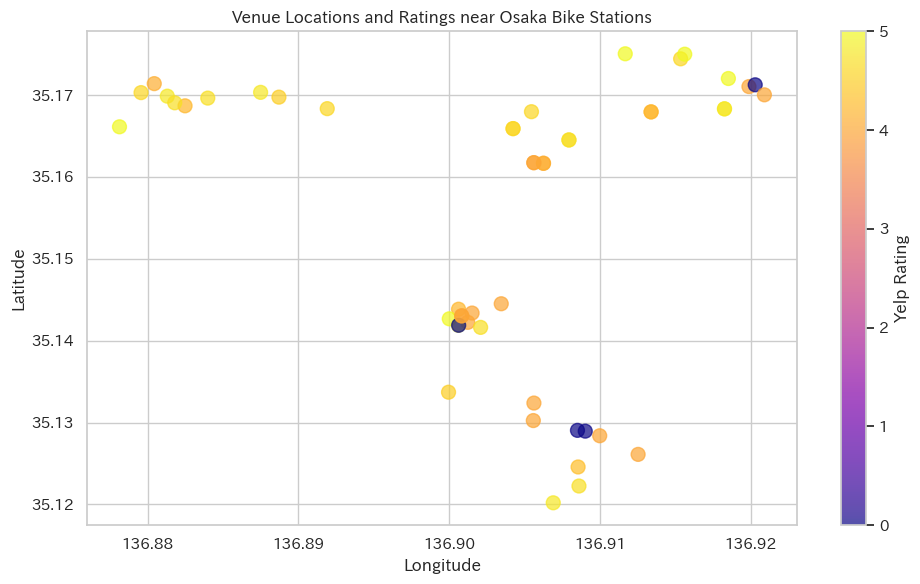

In [5]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    joined_osaka_venue_station_data["venue_longitude"],
    joined_osaka_venue_station_data["venue_latitude"],
    c=joined_osaka_venue_station_data["venue_rating"],
    cmap="plasma",
    s=100,
    alpha=0.7
)
plt.colorbar(scatter, label="Yelp Rating")
plt.title("Venue Locations and Ratings near Osaka Bike Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

From this Scatter Plot it can be gleaned that there is some correlation between location of venues (restaurants/bars) and the bike stations. This coordinate "map" shows that many of the venus are grouped together in roughly 3 areas, all within the vicinity of multiple bike stations.

While the ratings were included in this Scatter Plot as well, there does not seem to be any initial patterns that can be determined in that regard. The ratings do seem varied regardless of which "clump" of locations. Based on our data pool, it can be theorized that the area around 136.88 (long), 35.17 (lat) seems to have the highest concentration of the higher rated venues. The distribution of the lower rated venus, however, does not seem to have an relationship to their locations as highly rated venues are in the vicinity as well.

Scatter plot: Venue Ratings vs. Distance From Bike Stations

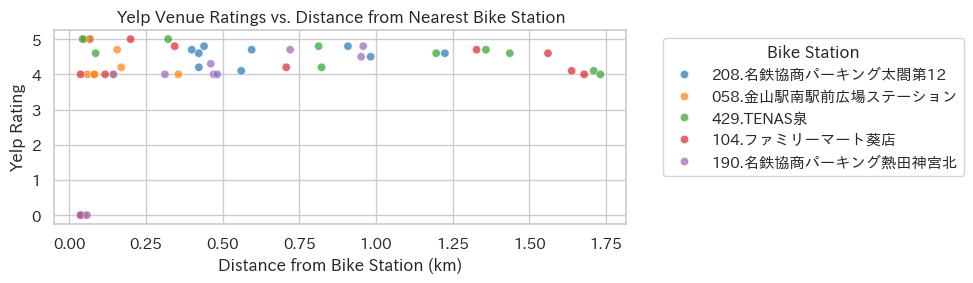

In [6]:
import numpy as np

# Haversine distance function to calc distance between each venue and its corresponding bike station

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

joined_osaka_venue_station_data["distance_km"] = joined_osaka_venue_station_data.apply(
    lambda row: haversine(
        row["latitude"], row["longitude"],
        row["venue_latitude"], row["venue_longitude"]
    ),
    axis=1
)

plt.figure(figsize=(10, 3))
sns.scatterplot(
    data=joined_osaka_venue_station_data,
    x="distance_km",
    y="venue_rating",
    hue="station_name",
    palette="tab10",
    alpha=0.7
)
plt.title("Yelp Venue Ratings vs. Distance from Nearest Bike Station")
plt.xlabel("Distance from Bike Station (km)")
plt.ylabel("Yelp Rating")
plt.legend(title="Bike Station", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

This Scatter Plot makes use of the Haversine Distance function to help us potentially interpret a correlation between the ratings of the venue to how far they are from their closest bike stations.

Using the legend indicated for the bike stations in question, we can see that there seems to be a slight relationship between the higher rated venues and the distances they are from their bike stations afterall. *ALL* of the 5.0 rated venues are within 0.75 km/750 m from their closest bike stations. While some other higher rated venus do exist further away, it can be surmised that what pushes a venue's rating to a full 5.0 score could be ease of access and proximity to bike share stations.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [7]:
import json
import pandas
import sqlite3

with open("joined_osaka_venue_station_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pandas.json_normalize(data)

conn = sqlite3.connect("osaka_stations_venues.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS stations")
cursor.execute("DROP TABLE IF EXISTS venues")

# Create "stations" table
cursor.execute("""
    CREATE TABLE stations (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        station_name TEXT,
        latitude REAL,
        longitude REAL
    )
""")

# Create "venues" table
cursor.execute("""
    CREATE TABLE venues (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        station_id INTEGER,
        station_name TEXT,
        venue_name TEXT,
        venue_category TEXT,
        venue_latitude REAL,
        venue_longitude REAL,
        venue_address TEXT,
        venue_rating REAL,
        FOREIGN KEY(station_id) REFERENCES stations(id)
    )
""")

station_ids = {}

for _, row in df.iterrows():
    station_key = (row["station_name"], row["latitude"], row["longitude"])

    if station_key not in station_ids:
        # Insert stations info
        cursor.execute("""
            INSERT INTO stations (station_name, latitude, longitude)
            VALUES (?, ?, ?)
        """, (row["station_name"], row["latitude"], row["longitude"]))

        station_id = cursor.lastrowid
        station_ids[station_key] = station_id
    else:
        station_id = station_ids[station_key]

    # Insert venues info
    cursor.execute("""
        INSERT INTO venues (
            station_id, station_name, venue_name, venue_category,
            venue_latitude, venue_longitude,
            venue_address, venue_rating
        )
        VALUES (?, ?, ?, ?, ?, ?, ?,?)
    """, (
        station_id,
        row["station_name"],
        row["venue_name"],
        row["venue_category"],
        row["venue_latitude"],
        row["venue_longitude"],
        row["venue_address"],
        None if row["venue_rating"] in ["N/A", None] else float(row["venue_rating"])
    ))
conn.commit()
conn.close()

(See "osaka_stations_venues.db" file in "Data" directory of this repo. for the result of this database creation)

Look at the data before and after the join to validate your data.

Check "stations" table

In [8]:
conn = sqlite3.connect("osaka_stations_venues.db")
cursor = conn.cursor()

query = "SELECT * FROM stations"
cursor.execute(query)

columns = [description[0] for description in cursor.description]
rows = cursor.fetchall()

print("\t".join(columns))
for row in rows:
    print("\t".join(str(cell) for cell in row))

conn.close()

id	station_name	latitude	longitude
1	208.名鉄協商パーキング太閤第12	35.166589	136.878612
2	058.金山駅南駅前広場ステーション	35.142331	136.900594
3	429.TENAS泉	35.175191	136.915203
4	104.ファミリーマート葵店	35.170937	136.920249
5	190.名鉄協商パーキング熱田神宮北	35.128727	136.908447


Check "venues" table

In [9]:
conn = sqlite3.connect("osaka_stations_venues.db")
cursor = conn.cursor()

query = "SELECT * FROM venues"
cursor.execute(query)

columns = [description[0] for description in cursor.description]
rows = cursor.fetchall()

print("\t".join(columns))
for row in rows:
    print("\t".join(str(cell) for cell in row))

conn.close()

id	station_id	station_name	venue_name	venue_category	venue_latitude	venue_longitude	venue_address	venue_rating
1	1	208.名鉄協商パーキング太閤第12	Maruya Honten Meieki	Unagi	35.169632	136.883985	中村区名駅1-2-1, 名鉄百貨店本館 9F, Nagoya, 愛知県 〒450-0002, Japan	4.7
2	1	208.名鉄協商パーキング太閤第12	Midtown BBQ Nagoya	Barbeque	35.168346	136.8919066	中村区名駅5丁目24−3, Nagoya, 愛知県 〒450-0002, Japan	4.6
3	1	208.名鉄協商パーキング太閤第12	Hitsumabushi Nagoya Bincho Esca	Unagi	35.1703019	136.8795604	中村区椿町6-9, 地下街内, Nagoya, 愛知県 〒453-0015, Japan	4.6
4	1	208.名鉄協商パーキング太閤第12	Misen JR Nagoya Station 	Ramen	35.1686903883	136.8824776713	中村区名駅1-1-4, Nagoya, 愛知県 〒450-0002, Japan	4.2
5	1	208.名鉄協商パーキング太閤第12	Ippudō Nagoyaekimendōri	Ramen	35.169868	136.881301	中村区名駅1-1-4, JR名古屋駅 名古屋うまいもん通り内, Nagoya, 愛知県 〒450-0002, Japan	4.8
6	1	208.名鉄協商パーキング太閤第12	Yanagibashi Kitarou	Sushi Bars	35.170334	136.887488	中村区名駅4-16-23, Nagoya, 愛知県, Japan	4.8
7	1	208.名鉄協商パーキング太閤第12	Maruya Honten JR Nagoya Eki 	Unagi	35.1690580255	136.8817941051	中村区名駅1-1-4, Nagoya, 愛知県 〒450-0002, Japan	4

JOIN data and validate

In [10]:
conn = sqlite3.connect("osaka_stations_venues.db")
cursor = conn.cursor()

query = """
SELECT * FROM stations AS s
JOIN venues AS v
ON s.station_name = v.station_name
"""

cursor.execute(query)

column_names = [description[0] for description in cursor.description]
rows = cursor.fetchall()
print("\t".join(column_names))
for row in rows:
    print("\t".join(str(cell) for cell in row))

conn.close()

id	station_name	latitude	longitude	id	station_id	station_name	venue_name	venue_category	venue_latitude	venue_longitude	venue_address	venue_rating
1	208.名鉄協商パーキング太閤第12	35.166589	136.878612	9	1	208.名鉄協商パーキング太閤第12	Erick South Kitte Nagoya	Indian	35.1697502136	136.8887023926	中村区名駅1-1-1, B1F, Nagoya, 愛知県 〒450-0002, Japan	4.5
1	208.名鉄協商パーキング太閤第12	35.166589	136.878612	3	1	208.名鉄協商パーキング太閤第12	Hitsumabushi Nagoya Bincho Esca	Unagi	35.1703019	136.8795604	中村区椿町6-9, 地下街内, Nagoya, 愛知県 〒453-0015, Japan	4.6
1	208.名鉄協商パーキング太閤第12	35.166589	136.878612	5	1	208.名鉄協商パーキング太閤第12	Ippudō Nagoyaekimendōri	Ramen	35.169868	136.881301	中村区名駅1-1-4, JR名古屋駅 名古屋うまいもん通り内, Nagoya, 愛知県 〒450-0002, Japan	4.8
1	208.名鉄協商パーキング太閤第12	35.166589	136.878612	7	1	208.名鉄協商パーキング太閤第12	Maruya Honten JR Nagoya Eki 	Unagi	35.1690580255	136.8817941051	中村区名駅1-1-4, Nagoya, 愛知県 〒450-0002, Japan	4.7
1	208.名鉄協商パーキング太閤第12	35.166589	136.878612	1	1	208.名鉄協商パーキング太閤第12	Maruya Honten Meieki	Unagi	35.169632	136.883985	中村区名駅1-2-1, 名鉄百貨店本館 9F, Nagoya, 愛知県

The two tables in this database (that were created via SQLite3) were validated by connecting to this new database and querying all (SELECT * FROM) for both and printing the output to check. Both were as expected.

Additionally, the 2 were JOINed via the primary key "station_name" for a new output table. This data was then validated by seeing all corresponding data printed and accounted for in the output.